<a href="https://colab.research.google.com/github/Ohm-T/Parkinson-Classification/blob/main/Cassiop%C3%A9e%20Cl%C3%A9ment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from pandas import DataFrame

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #a modifier en fonction de l'emplacement de la base de données dans votre drive ou votre ordinateur

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Récupération des données


In [ ]:
#@title Personne 1

In [ ]:
df_1 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/001/task_1.txt',header=None,sep=" ")
df_1.columns = ["temp"]
df_1[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_1.temp.str.split(",",expand=True) 
del df_1['temp']
del df_1['0']
del df_1['TIME']

df_2 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/002/task_1.txt',header=None,sep=" ")
df_2.columns = ["temp"]
df_2[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_2.temp.str.split(",",expand=True) 
del df_2['temp']
del df_2['0']
del df_2['TIME']

df_3 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/003/task_1.txt',header=None,sep=" ")
df_3.columns = ["temp"]
df_3[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_3.temp.str.split(",",expand=True) 
del df_3['temp']
del df_3['0']
del df_3['TIME']

df_4 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/004/task_1.txt',header=None,sep=" ")
df_4.columns = ["temp"]
df_4[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_4.temp.str.split(",",expand=True) 
del df_4['temp']
del df_4['0']
del df_4['TIME']

df_5 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/005/task_1.txt',header=None,sep=" ")
df_5.columns = ["temp"]
df_5[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_5.temp.str.split(",",expand=True) 
del df_5['temp']
del df_5['0']
del df_5['TIME']

df_6 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/006/task_1.txt',header=None,sep=" ")
df_6.columns = ["temp"]
df_6[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_6.temp.str.split(",",expand=True) 
del df_6['temp']
del df_6['0']
del df_6['TIME']

df_7 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/007/task_1.txt',header=None,sep=" ")
df_7.columns = ["temp"]
df_7[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_7.temp.str.split(",",expand=True) 
del df_7['temp']
del df_7['0']
del df_7['TIME']

df_81 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/008/OFF_1/task_1.txt',header=None,sep=" ")
df_81.columns = ["temp"]
df_81[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_81.temp.str.split(",",expand=True) 
del df_81['temp']
del df_81['0']
del df_81['TIME']

df_82 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/008/OFF_2/task_1.txt',header=None,sep=" ")
df_82.columns = ["temp"]
df_82[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_82.temp.str.split(",",expand=True) 
del df_82['temp']
del df_82['0']
del df_82['TIME']

df_9 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/009/task_1.txt',header=None,sep=" ")
df_9.columns = ["temp"]
df_9[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_9.temp.str.split(",",expand=True) 
del df_9['temp']
del df_9['0']
del df_9['TIME']

df_10 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/010/task_1.txt',header=None,sep=" ")
df_10.columns = ["temp"]
df_10[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_10.temp.str.split(",",expand=True) 
del df_10['temp']
del df_10['0']
del df_10['TIME']

df_11 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/011/task_1.txt',header=None,sep=" ")
df_11.columns = ["temp"]
df_11[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_11.temp.str.split(",",expand=True) 
del df_11['temp']
del df_11['0']
del df_11['TIME']

df_12 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/012/task_1.txt',header=None,sep=" ")
df_12.columns = ["temp"]
df_12[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_12.temp.str.split(",",expand=True) 
del df_12['temp']
del df_12['0']
del df_12['TIME']

df_12

In [ ]:
df_4 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/004/task_1.txt',header=None,sep=" ")
df_4.columns = ["temp"]
df_4[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_4.temp.str.split(",",expand=True) 
del df_4['temp']
del df_4['0']
del df_4['TIME']

In [ ]:
df_5 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/005/task_1.txt',header=None,sep=" ")
df_5.columns = ["temp"]
df_5[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_5.temp.str.split(",",expand=True) 
del df_5['temp']
del df_5['0']
del df_5['TIME']

In [ ]:
df_6 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/006/task_1.txt',header=None,sep=" ")
df_6.columns = ["temp"]
df_6[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_6.temp.str.split(",",expand=True) 
del df_6['temp']
del df_6['0']
del df_6['TIME']

In [ ]:
X = df_1.drop('FoG', axis='columns')
y = pd.to_numeric(df_1[df_1.columns[56]])
X

,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,...,WaistGYROX,WaistGYROY,WaistGYROZ,ArmACCX,ArmACCY,ArmACCZ,ArmGYROX,ArmGYROY,ArmGYROZ,SC
0,7.064,7.3853,5.3534,6.9239999999999995,3.7559,1.7674,4.4223,6.7464,10.777999999999999,3.7583,...,32.0,495.0,114.99999999999996,7864.999999999997,4712.0,-1087.0000000000002,661.0,-688.0000000000001,509.0,1830.0
1,7.8537,7.6998,6.1821,6.9615,3.8015,1.2309,4.1826,6.7128,10.5566,2.9936,...,31.084582285851546,508.3143625619463,117.6116513602482,8055.034672936841,4661.843221132418,-1105.551849700487,657.591356318603,-723.7358033380314,533.3733042627478,1830.000024975919
2,9.8257,9.1855,8.1727,7.9598,5.3095,2.0016,5.3646,7.9092,12.0235,4.0203,...,30.09335063885403,524.387974965697,119.67077591229156,8224.98366769971,4607.356201127454,-1114.1575083679693,662.330623225968,-762.9319993019711,563.7483589721879,1830.000018712776
3,12.2397,11.2825,10.5597,9.531,7.6492,3.5774,7.4899,9.7218,14.5659,6.4164,...,28.25982784889776,541.4044060888043,121.52407478429829,8379.215326000023,4552.647570554921,-1094.5872421857157,672.8742119737909,-801.6602935978467,595.4367615508307,1829.9999999616748
4,14.2806,13.2718,12.5526,11.1866,9.783999999999999,5.2566,9.5088,11.3648,16.6226,9.1463,...,24.817536705955504,557.547224807996,123.51824910421787,8522.097989534535,4501.825959988033,-1028.6113173357255,686.8785338143692,-835.9923919293071,623.7501094197453,1829.9999874737161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180496,13.4574,12.9637,10.9016,10.6666,10.1241,7.7911,7.6474,7.9377,4.942,-5.5287,...,-13.809834213572461,31.347194351283434,19.056476487234526,2334.056456643045,7361.136505364567,3317.5079412699047,98.71579934601047,76.21574182358978,-7.0829270380630325,1640.0001087110377
180497,15.0615,15.5597,12.3495,12.8891,11.3221,10.5797,9.5361,9.2444,7.5713,-1.4217,...,-11.453962684594359,34.00084515321725,18.681401997879163,2328.9333098958064,7358.299736967412,3316.9002675321417,99.6066855628172,77.93152651511956,-7.1795711207090696,1640.000135101448
180498,16.3636,17.3752,13.4653,15.0994,12.4483,13.6728,11.3722,10.5227,10.8216,3.9685,...,-8.493174048817789,36.38089877956757,18.078089264916446,2324.3819348269103,7351.694715888174,3316.438623159417,100.53967210663562,79.23944029492714,-7.234751684325269,1640.00010713634
180499,16.667,17.778,13.6059,16.616,13.0492,16.4723,12.6855,11.2524,14.1313,9.9318,...,-5.488256942025441,37.907301603954956,17.449851021304127,2321.153706505321,7343.5264632059925,3316.3846525244603,101.38177243363886,80.23156938316856,-7.193288165294595,1640.0000527808213


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

In [ ]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
model.score(X_test, y_test)

0.9562452678038301

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[101463,   1976],
       [  5132,  53880]])

Text(69.0, 0.5, 'Truth')

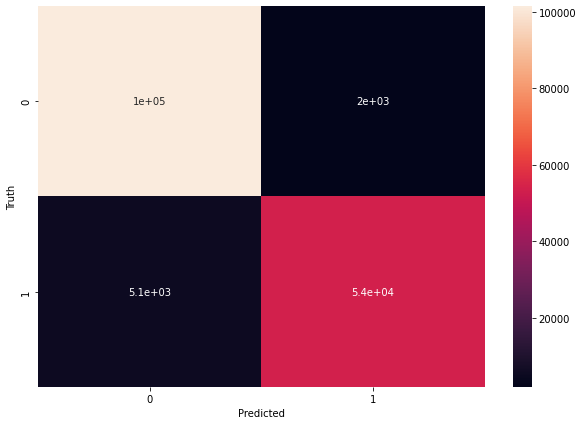

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(np.linspace(1,180501,180501), pd.to_numeric(df_1[df_1.columns[50]]))
plt.plot(np.linspace(1,180501,180501), 2000*pd.to_numeric(df_1[df_1.columns[57]]))

plt.figure(figsize = (20, 10))
plt.plot(np.linspace(1,180501,180501), pd.to_numeric(df_1[df_1.columns[51]]))
plt.plot(np.linspace(1,180501,180501), 2000*pd.to_numeric(df_1[df_1.columns[57]]))

plt.figure(figsize = (20, 10))
plt.plot(np.linspace(1,180501,180501), pd.to_numeric(df_1[df_1.columns[52]]))
plt.plot(np.linspace(1,180501,180501), 2000*pd.to_numeric(df_1[df_1.columns[57]]))

plt.figure(figsize = (20, 10))
plt.plot(np.linspace(1,180501,180501), pd.to_numeric(df_1[df_1.columns[53]]))
plt.plot(np.linspace(1,180501,180501), 2000*pd.to_numeric(df_1[df_1.columns[57]]))

plt.figure(figsize = (20, 10))
plt.plot(np.linspace(1,180501,180501), pd.to_numeric(df_1[df_1.columns[54]]))
plt.plot(np.linspace(1,180501,180501), 3000*pd.to_numeric(df_1[df_1.columns[57]]))

plt.figure(figsize = (20, 10))
plt.plot(np.linspace(1,180501,180501), pd.to_numeric(df_1[df_1.columns[55]]))
plt.plot(np.linspace(1,180501,180501), 2000*pd.to_numeric(df_1[df_1.columns[57]]))

plt.figure(figsize = (20, 10))
plt.plot(np.linspace(1,180501,180501), pd.to_numeric(df_1[df_1.columns[56]]))
plt.plot(np.linspace(1,180501,180501), 2000*pd.to_numeric(df_1[df_1.columns[57]])+1750)

In [ ]:
plt.figure(figsize = (20, 10))
plt.title("ArmGYROZ et état FoG en fonction du temps")
plt.plot(np.linspace(1,180501,180501), pd.to_numeric(df_1[df_1.columns[55]]))
plt.plot(np.linspace(1,180501,180501), 2000*pd.to_numeric(df_1[df_1.columns[57]]))

In [ ]:
gyroz = pd.to_numeric(df_1[df_1.columns[55]])
fog = pd.to_numeric(df_1[df_1.columns[57]])
gyroz1_1 = []
fog1_1 = []
for i in range(len(gyroz)):
  gyroz1_1.append(abs(gyroz[i]))
  fog1_1.append(2000*fog[i])

gyroz = pd.to_numeric(df_2[df_2.columns[55]])
fog = pd.to_numeric(df_2[df_2.columns[57]])
gyroz1_2 = []
fog1_2 = []
for i in range(len(gyroz)):
  gyroz1_2.append(abs(gyroz[i]))
  fog1_2.append(2000*fog[i])

gyroz = pd.to_numeric(df3_1[df3_1.columns[55]])
fog = pd.to_numeric(df3_1[df3_1.columns[57]])
gyroz3_1 = []
fog3_1 = []
for i in range(len(gyroz)):
  gyroz3_1.append(abs(gyroz[i]))
  fog3_1.append(2000*fog[i])

plt.figure(figsize = (20,10))
plt.plot(np.linspace(0,180500,180501), gyroz1_1)
plt.plot(np.linspace(0,180500,180501), 180501*)
#plt.plot(np.linspace(0,180500,180501), fog1_1)

In [ ]:
print(df_1.shape[0])

180501


[[195.20010516]
 [935.12488301]]


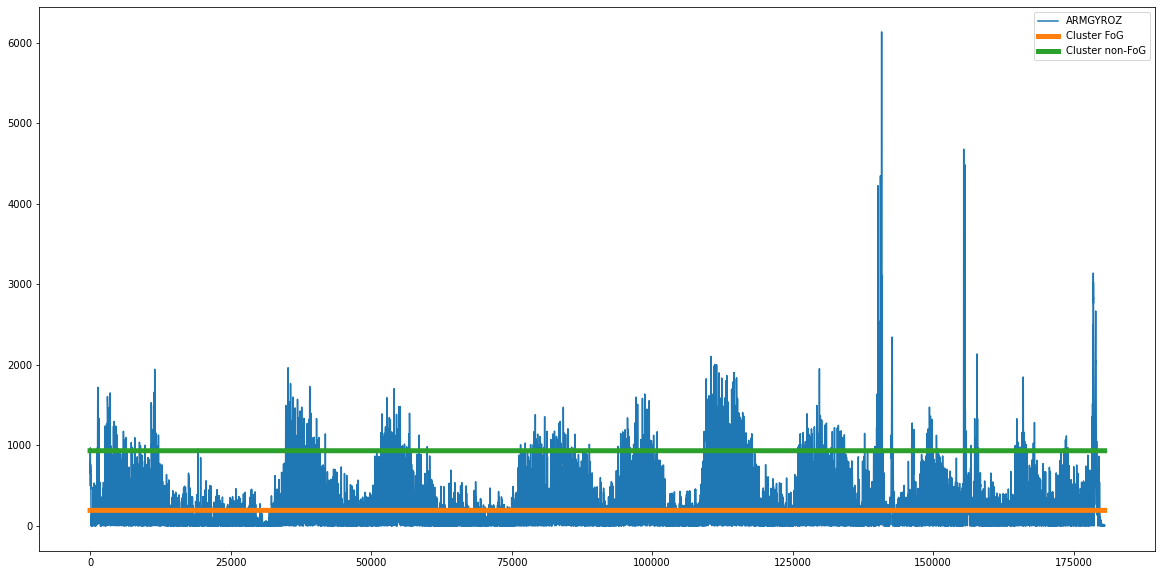

In [ ]:
# Clustering selon l'amplitude du mouvement gyroz
kmeans = cluster.KMeans(n_clusters = 2, init = "k-means++")
gyroz1_1 = np.array(gyroz1_1)
gyroz1_1 = gyroz1_1.reshape(len(gyroz1_1), -1)
label = kmeans.fit(gyroz1_1)
print(kmeans.cluster_centers_)

plt.figure(figsize = (20,10))
n1_1 = df_1.shape[0]
plt.plot(np.linspace(0,n1_1 - 1, n1_1), gyroz1_1, label = 'ARMGYROZ')
plt.plot(np.linspace(0,n1_1 - 1, n1_1), n1_1*[kmeans.cluster_centers_[0]], label = 'Cluster FoG', linewidth=5)
plt.plot(np.linspace(0,n1_1 - 1, n1_1), n1_1*[kmeans.cluster_centers_[1]], label = 'Cluster non-FoG', linewidth=5)
plt.legend()

In [ ]:
kmeans = cluster.KMeans(n_clusters = 2, init = "k-means++")
gyroz1_2 = np.array(gyroz1_2)
gyroz1_2 = gyroz1_2.reshape(len(gyroz1_2), -1)
label1_2 = kmeans.fit(gyroz1_2)
print(kmeans.cluster_centers_)

[[106.57360778]
 [415.10617006]]


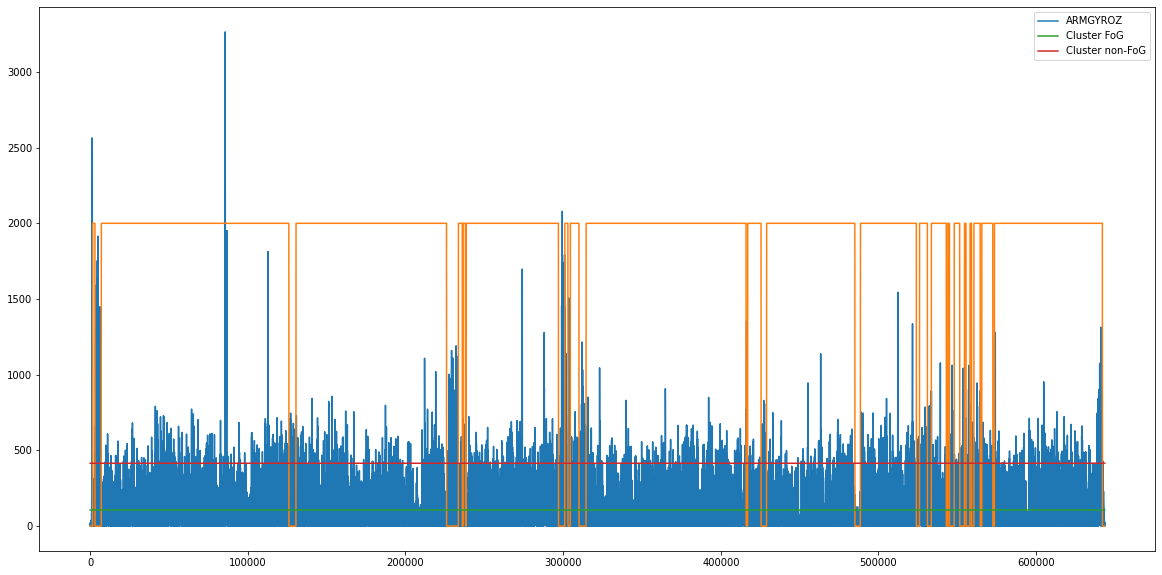

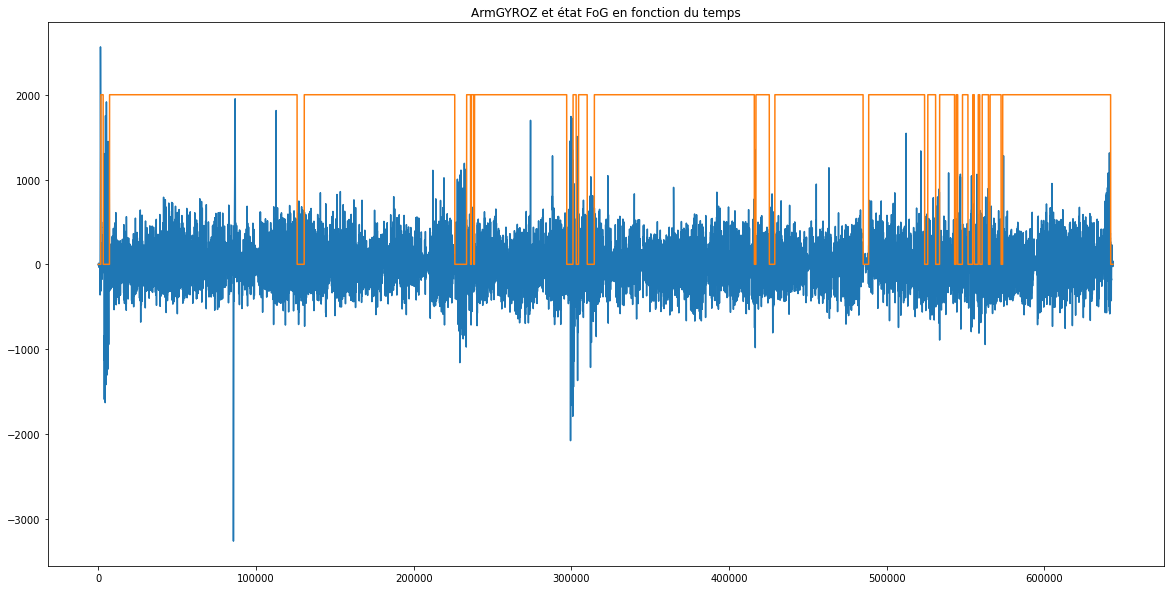

In [ ]:
kmeans = cluster.KMeans(n_clusters = 2, init = "k-means++")
gyroz3_1 = np.array(gyroz3_1)
gyroz3_1 = gyroz3_1.reshape(len(gyroz3_1), -1)
label3_1 = kmeans.fit(gyroz3_1)
print(kmeans.cluster_centers_)

plt.figure(figsize = (20,10))
n3_1 = df3_1.shape[0]
plt.plot(np.linspace(0,n3_1 - 1, n3_1), gyroz3_1, label = 'ARMGYROZ')
plt.plot(np.linspace(0,n3_1-1, n3_1), 2000*pd.to_numeric(df3_1[df3_1.columns[57]]))
plt.plot(np.linspace(0,n3_1 - 1, n3_1), n3_1*[kmeans.cluster_centers_[0]], label = 'Cluster FoG')
plt.plot(np.linspace(0,n3_1 - 1, n3_1), n3_1*[kmeans.cluster_centers_[1]], label = 'Cluster non-FoG')
plt.legend()

plt.figure(figsize = (20, 10))
plt.title("ArmGYROZ et état FoG en fonction du temps")
plt.plot(np.linspace(0,n3_1-1, n3_1), pd.to_numeric(df3_1[df3_1.columns[55]]))
plt.plot(np.linspace(0,n3_1-1, n3_1), 2000*pd.to_numeric(df3_1[df3_1.columns[57]]))

55


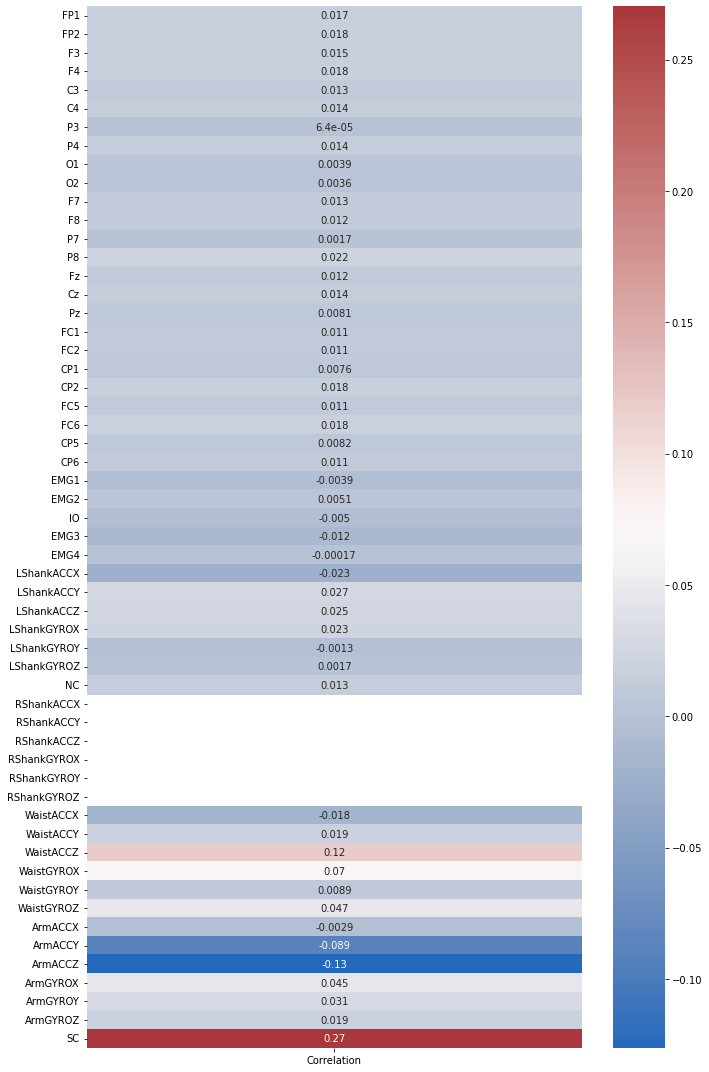

In [ ]:
fig = plt.figure(figsize=(10,15))

corr = []
for i in range(1,57):
  corr.append(pd.to_numeric(df_1[df_1.columns[i]]).corr(pd.to_numeric(df_1[df_1.columns[57]])))

for i in range(len(corr)):
  if max(corr) == corr[i]:
    print(i)

cor = pd.DataFrame(corr, columns=['Correlation'])
cor.index = df_1.columns[1:57]
ax = sns.heatmap(cor, cmap='vlag', annot=True)
plt.tight_layout()
plt.show()

In [ ]:
df_2 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/001/task_1.txt',header=None,sep=" ")
df_2.columns = ["temp"]
df_2[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_2.temp.str.split(",",expand=True) 
del df_2['temp']
del df_2['0']

In [ ]:
df_3 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/001/task_3.txt',header=None,sep=" ")
df_3.columns = ["temp"]
df_3[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_3.temp.str.split(",",expand=True) 
del df_3['temp']
del df_3['0']
print(df_3.shape)

(14501, 58)


In [ ]:
df_4 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/001/task_4.txt',header=None,sep=" ")
df_4.columns = ["temp"]
df_4[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df_4.temp.str.split(",",expand=True) 
del df_4['temp']
del df_4['0']

In [ ]:
max_corr = []
corr_1, corr_2, corr_3, corr_4 = [], [], [], []

for i in range(1,57):
  corr_1.append(pd.to_numeric(df_1[df_1.columns[i]]).corr(pd.to_numeric(df_1[df_1.columns[57]])))
for i in range(1,57):
  corr_2.append(pd.to_numeric(df_2[df_2.columns[i]]).corr(pd.to_numeric(df_2[df_2.columns[57]])))
for i in range(1,57):
  corr_3.append(pd.to_numeric(df_3[df_3.columns[i]]).corr(pd.to_numeric(df_3[df_3.columns[57]])))
for i in range(1,57):
  corr_4.append(pd.to_numeric(df_4[df_4.columns[i]]).corr(pd.to_numeric(df_4[df_4.columns[57]])))

for i in range(len(corr_1)):
  if max(corr_1) == corr[i]:
    max_corr.append(i+1)
for i in range(len(corr_2)):
  if max(corr_2) == corr[i]:
    max_corr.append(i+1)
for i in range(len(corr_3)):
  if max(corr_3) == corr[i]:
    max_corr.append(i+1)
for i in range(len(corr_4)):
  if max(corr_4) == corr[i]:
    max_corr.append(i+1)

print(max_corr)

[56, 56]


In [ ]:
print(df_3)

               TIME       FP1                  FP2                  F3  \
0          12:20:09   -8.8819              -9.4853             -7.7914   
1      12:20:09.002   -8.7917              -8.7733             -7.3297   
2      12:20:09.004   -9.3481   -8.857999999999997             -7.4682   
3      12:20:09.006  -10.1607              -9.5634              -7.915   
4      12:20:09.008  -11.0262             -10.6876             -8.4154   
...             ...       ...                  ...                 ...   
14496  12:20:37.992   -6.1797  -10.027000000000001             -6.1603   
14497  12:20:37.994   -8.2978             -12.1965  -8.097999999999999   
14498  12:20:37.996  -10.3023              -14.167              -9.787   
14499  12:20:37.998  -11.0582             -14.6092            -10.2371   
14500      12:20:38  -10.1474             -13.2177             -9.1521   

            F4       C3       C4       P3        P4       O1  ...  \
0      -4.7279  -5.2308  -1.4067  -3.0101 

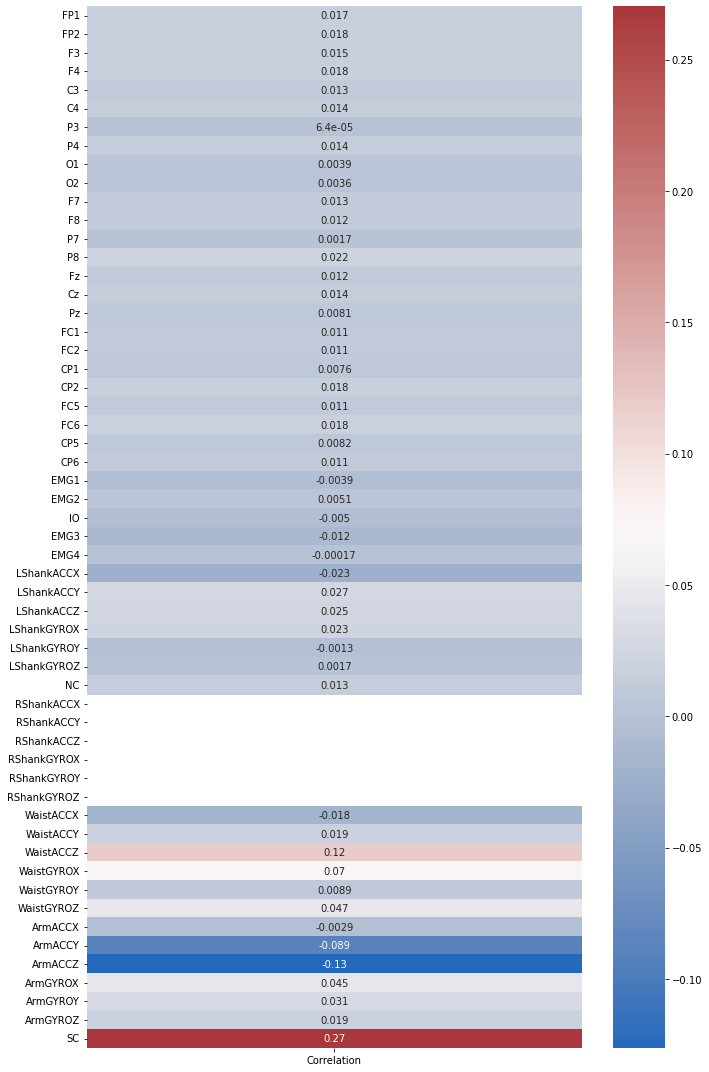

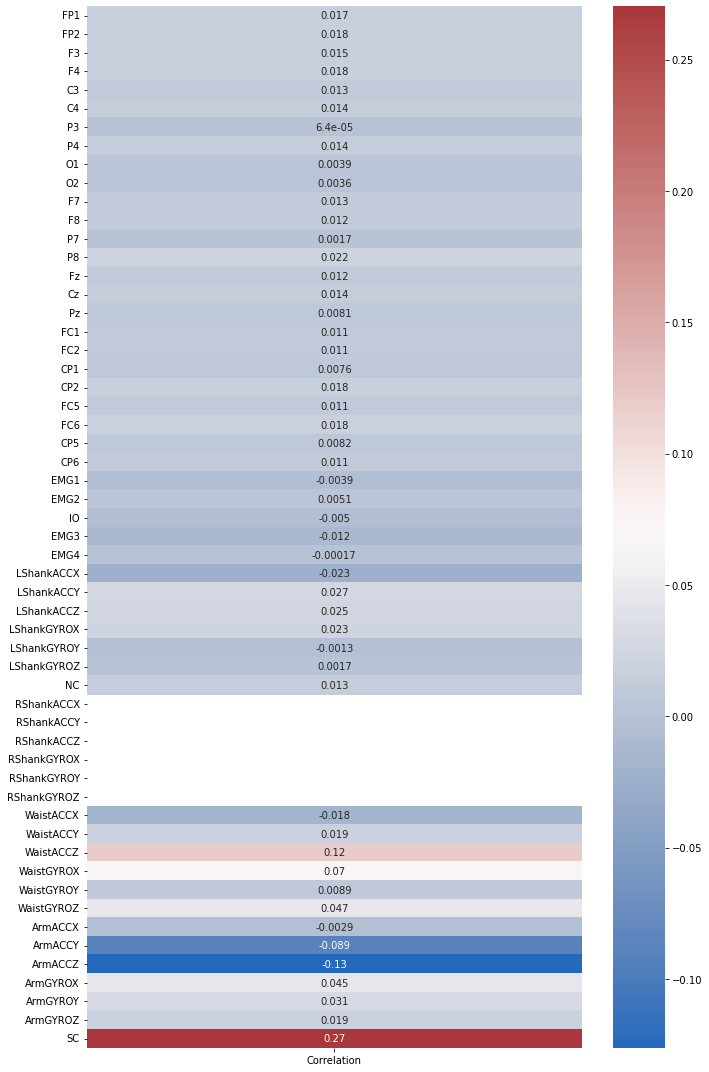

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


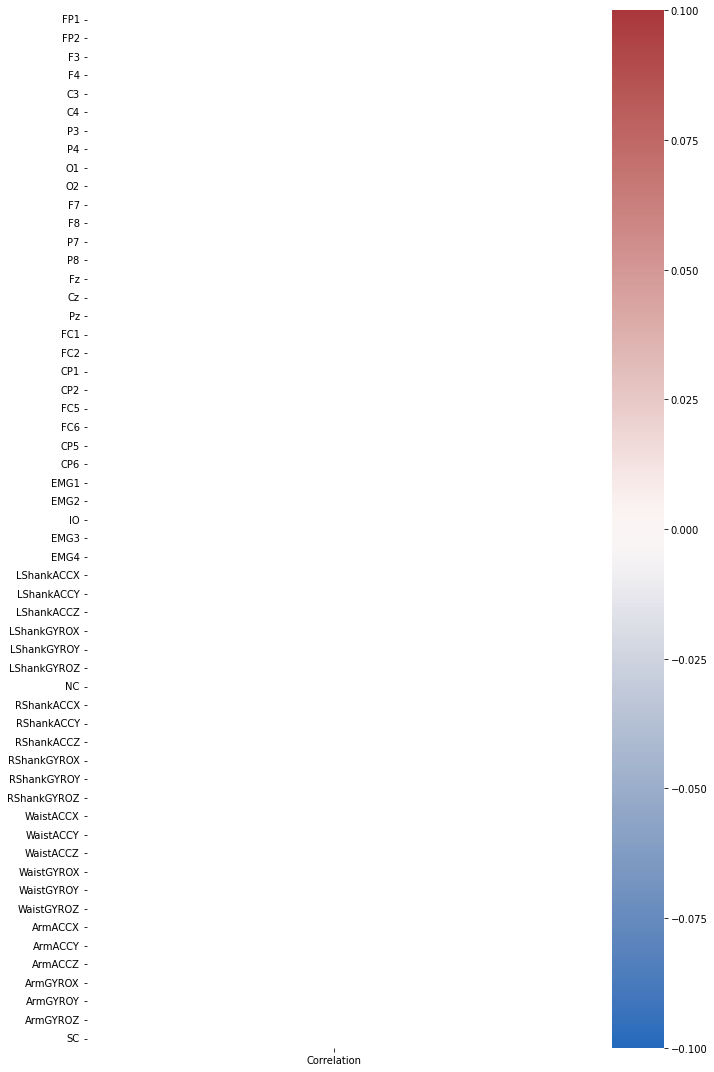

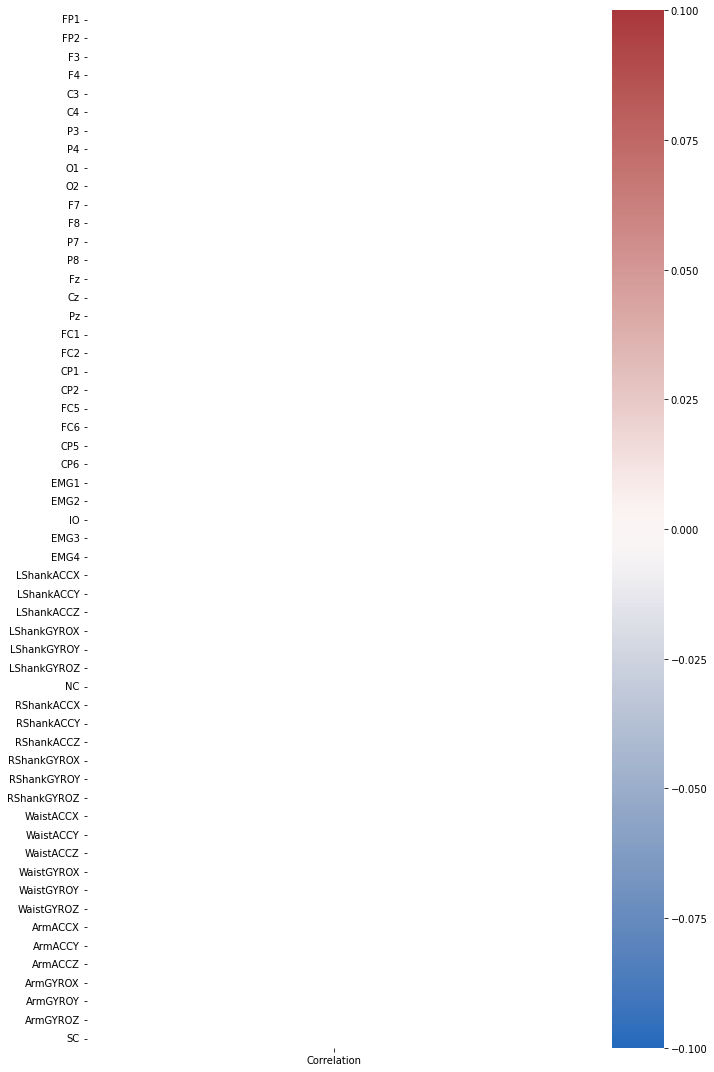

In [ ]:
fig = plt.figure(figsize=(10,15))

corr = []
for i in range(1,57):
  corr.append(pd.to_numeric(df_1[df_1.columns[i]]).corr(pd.to_numeric(df_1[df_1.columns[57]])))

cor = pd.DataFrame(corr, columns=['Correlation'])
cor.index = df_1.columns[1:57]
ax = sns.heatmap(cor, cmap='vlag', annot=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,15))

corr = []
for i in range(1,57):
  corr.append(pd.to_numeric(df_2[df_2.columns[i]]).corr(pd.to_numeric(df_2[df_2.columns[57]])))

cor = pd.DataFrame(corr, columns=['Correlation'])
cor.index = df_2.columns[1:57]
ax = sns.heatmap(cor, cmap='vlag', annot=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,15))

corr = []
for i in range(1,57):
  corr.append(pd.to_numeric(df_3[df_3.columns[i]]).corr(pd.to_numeric(df_3[df_3.columns[57]])))

cor = pd.DataFrame(corr, columns=['Correlation'])
cor.index = df_3.columns[1:57]
ax = sns.heatmap(cor, cmap='vlag', annot=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10,15))

corr = []
for i in range(1,57):
  corr.append(pd.to_numeric(df_4[df_4.columns[i]]).corr(pd.to_numeric(df_4[df_4.columns[57]])))

cor = pd.DataFrame(corr, columns=['Correlation'])
cor.index = df_4.columns[1:57]
ax = sns.heatmap(cor, cmap='vlag', annot=True)
plt.tight_layout()
plt.show()

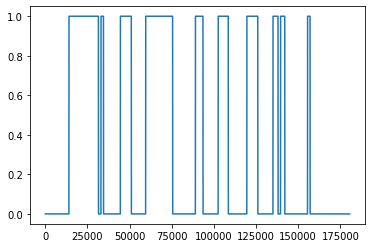

In [ ]:
L=[]
for i in range(len(df_1)):
  L.append(df_1['FoG'][i])

FoG_indexes = []
for i in range(len(L)):
  if df_1['FoG'][i] == '0':
    FoG_indexes.append(0)
  else:
    FoG_indexes.append(1)

plt.plot(np.linspace(1, len(FoG_indexes), len(FoG_indexes)), FoG_indexes)

In [ ]:
FP1_1 = []
for i in range(len(df_1['FP1'])):
  FP1_1.append(np.double(df_1['FP1'][i]))

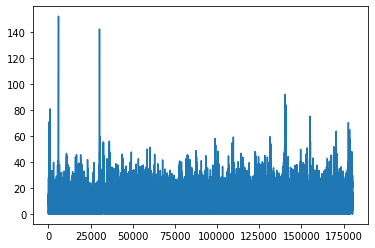

In [ ]:
plt.plot(np.linspace(1, len(df_1['FP1']), len(df_1['FP1'])), np.abs(FP1_1))

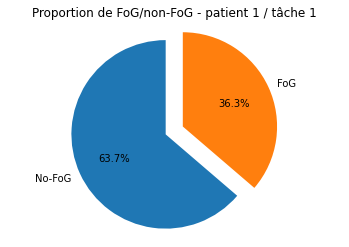

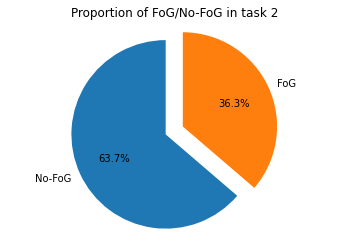

In [ ]:
size_1 = np.divide([np.count_nonzero(df_1['FoG'] == '0'), np.count_nonzero(df_1['FoG'] == '1')], np.shape(df_1)[0])

fig, ax = plt.subplots()
explode = (0.1, 0.1)
ax.pie(size_1, explode=explode, labels=['No-FoG', 'FoG'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Proportion de FoG/non-FoG - patient 1 / tâche 1', color = 'Black')
plt.tight_layout
plt.show()

size_2 = np.divide([np.count_nonzero(df_2['FoG'] == '0'), np.count_nonzero(df_2['FoG'] == '1')], np.shape(df_2)[0])

fig, ax = plt.subplots()
explode = (0.1, 0.1)
ax.pie(size_2, explode=explode, labels=['No-FoG', 'FoG'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Proportion of FoG/No-FoG in task 2', color = 'Black')
plt.tight_layout
plt.show()

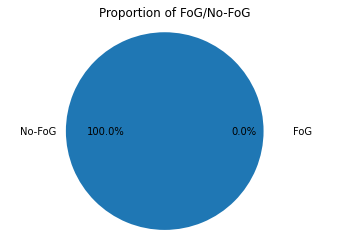

In [ ]:
size_3 = np.divide([np.count_nonzero(df_3['FoG'] == '0'), np.count_nonzero(df_3['FoG'] == '1')], np.shape(df_3)[0])

fig, ax = plt.subplots()
explode = (0.1, 0.1)
ax.pie(size_3, explode=explode, labels=['No-FoG', 'FoG'], autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Proportion of FoG/No-FoG', color = 'Black')
plt.tight_layout
plt.show()

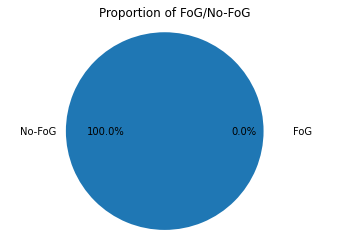

In [ ]:
size_4 = np.divide([np.count_nonzero(df_4['FoG'] == '0'), np.count_nonzero(df_4['FoG'] == '1')], np.shape(df_4)[0])

fig, ax = plt.subplots()
explode = (0.1, 0.1)
ax.pie(size_4, explode=explode, labels=['No-FoG', 'FoG'], autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Proportion of FoG/No-FoG', color = 'Black')
plt.tight_layout
plt.show()

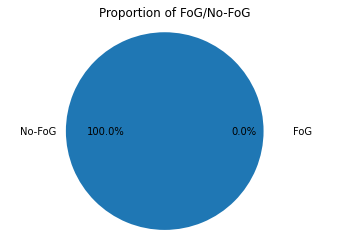

In [ ]:
size_5 = np.divide([np.count_nonzero(df_5['FoG'] == '0'), np.count_nonzero(df_5['FoG'] == '1')], np.shape(df_5)[0])

fig, ax = plt.subplots()
explode = (0.1, 0.1)
ax.pie(size_5, explode=explode, labels=['No-FoG', 'FoG'], autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Proportion of FoG/No-FoG', color = 'Black')
plt.tight_layout
plt.show()

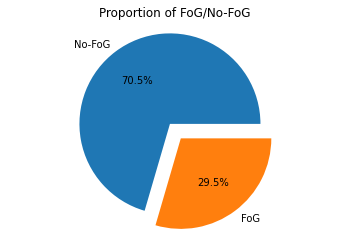

In [ ]:
size_6 = np.divide([np.count_nonzero(df_6['FoG'] == '0'), np.count_nonzero(df_6['FoG'] == '1')], np.shape(df_6)[0])

fig, ax = plt.subplots()
explode = (0.1, 0.1)
ax.pie(size_6, explode=explode, labels=['No-FoG', 'FoG'], autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Proportion of FoG/No-FoG', color = 'Black')
plt.tight_layout
plt.show()

In [ ]:
#@title Personne 2

In [ ]:
df2_1 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/002/task_1.txt',header=None,sep=" ")
df2_1.columns = ["temp"]
df2_1[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df2_1.temp.str.split(",",expand=True) 
del df2_1['temp']
del df2_1['0']

In [ ]:
df2_2 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/002/task_2.txt',header=None,sep=" ")
df2_2.columns = ["temp"]
df2_2[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df2_2.temp.str.split(",",expand=True) 
del df2_2['temp']
del df2_2['0']

                TIME      FP1       FP2  ... ArmGYROZ   SC FoG
0           10:39:09  -0.7497  -18.0034  ...      0.0  0.0   0
1       10:39:09.002  -2.9047  -16.4305  ...      0.0  0.0   0
2       10:39:09.004  -4.7339  -13.9466  ...      0.0  0.0   0
3       10:39:09.006  -6.7158  -11.4025  ...      0.0  0.0   0
4       10:39:09.008  -8.9608   -9.2635  ...      0.0  0.0   0
...              ...      ...       ...  ...      ...  ...  ..
119496  10:43:07.992  -5.6947    1.4305  ...      0.0  0.0   0
119497  10:43:07.994  -0.4194    1.1721  ...      0.0  0.0   0
119498  10:43:07.996   4.3539    0.1954  ...      0.0  0.0   0
119499  10:43:07.998   7.4714   -0.5025  ...      0.0  0.0   0
119500      10:43:08   8.5847   -0.6576  ...      0.0  0.0   0

[119501 rows x 58 columns]


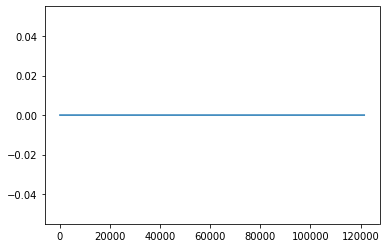

In [ ]:
L=[]
for i in range(len(df2_1)):
  L.append(df2_1['FoG'][i])

FoG_indexes = []
for i in range(len(L)):
  if df2_1['FoG'][i] == '0':
    FoG_indexes.append(0)
  else:
    FoG_indexes.append(1)

plt.plot(np.linspace(1, len(FoG_indexes), len(FoG_indexes)), FoG_indexes)

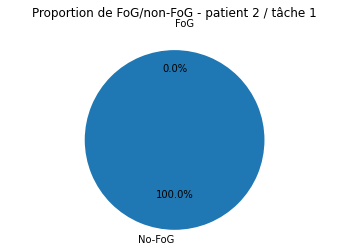

In [ ]:
size2_1 = np.divide([np.count_nonzero(df2_1['FoG'] == '0'), np.count_nonzero(df2_1['FoG'] == '1')], np.shape(df2_1)[0])

fig, ax = plt.subplots()
explode = (0.1, 0.1)
ax.pie(size2_1, explode=explode, labels=['No-FoG', 'FoG'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Proportion de FoG/non-FoG - patient 2 / tâche 1', color = 'Black')
plt.tight_layout
plt.show()

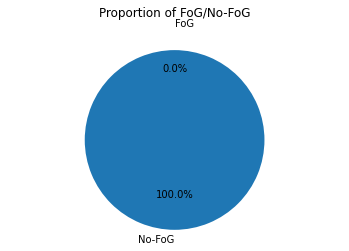

In [ ]:
size2_2 = np.divide([np.count_nonzero(df2_2['FoG'] == '0'), np.count_nonzero(df2_2['FoG'] == '1')], np.shape(df2_2)[0])

fig, ax = plt.subplots()
explode = (0.1, 0.1)
ax.pie(size2_2, explode=explode, labels=['No-FoG', 'FoG'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Proportion of FoG/No-FoG', color = 'Black')
plt.tight_layout
plt.show()

In [ ]:
#@title Personne 3 

In [ ]:
df3_1 = pd.read_table(
    'drive/MyDrive/Multimodal dataset of Freezing of Gait in PD/Filtered data/003/task_1.txt',header=None,sep=" ")
df3_1.columns = ["temp"]
df3_1[['0','TIME','FP1','FP2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','P7','P8','Fz','Cz','Pz','FC1','FC2','CP1','CP2','FC5','FC6','CP5','CP6','EMG1','EMG2','IO','EMG3','EMG4',
      'LShankACCX','LShankACCY','LShankACCZ','LShankGYROX','LShankGYROY','LShankGYROZ','NC','RShankACCX','RShankACCY','RShankACCZ','RShankGYROX','RShankGYROY','RShankGYROZ','NC','WaistACCX',
      'WaistACCY','WaistACCZ','WaistGYROX','WaistGYROY','WaistGYROZ','NC','ArmACCX','ArmACCY','ArmACCZ','ArmGYROX','ArmGYROY','ArmGYROZ','SC','FoG']] = df3_1.temp.str.split(",",expand=True) 
del df3_1['temp']
del df3_1['0']

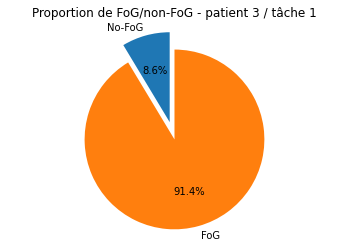

In [ ]:
size3_1 = np.divide([np.count_nonzero(df3_1['FoG'] == '0'), np.count_nonzero(df3_1['FoG'] == '1')], np.shape(df3_1)[0])

fig, ax = plt.subplots()
explode = (0.1, 0.1)
ax.pie(size3_1, explode=explode, labels=['No-FoG', 'FoG'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Proportion de FoG/non-FoG - patient 3 / tâche 1', color = 'Black')
plt.tight_layout
plt.show()